In [2]:
from copyreg import pickle

import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import XGBClassifier

# **Data Editing**

In [2]:
df = pd.read_csv("Obesity_DataSet.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
(df.isna().sum())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(24)

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.dtypes

Gender                             object
Age                                 int64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [7]:
correlation = df.corr(numeric_only=True)

In [8]:
df[["Age", "Height", "Weight"]].corr()


,Age,Height,Weight
Age,1.000000,-0.031551,0.199063
Height,-0.031551,1.000000,0.456591
Weight,0.199063,0.456591,1.000000


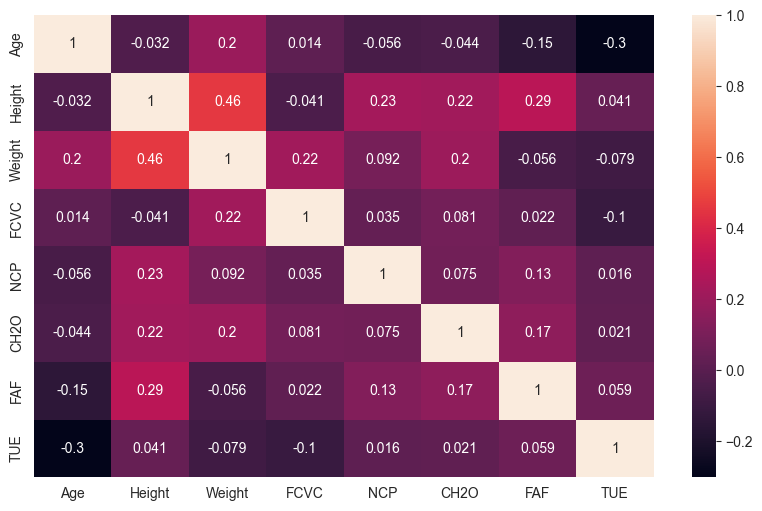

In [9]:
# Veriler arasindaki korelasyonu bir grafik ile gostermek

plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True)
plt.show()

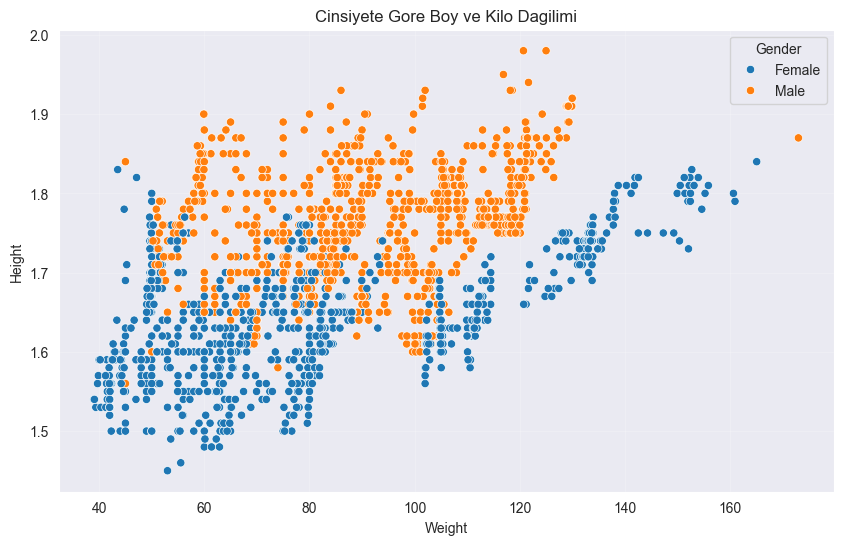

In [10]:
# Scatter plot kullanarak cinsiyete gore kilolarin gorunumu


plt.figure(figsize=(10,6))
sns.scatterplot(x="Weight", y="Height", hue="Gender", data=df)
plt.title("Cinsiyete Gore Boy ve Kilo Dagilimi")
plt.grid(True, alpha=0.2)
plt.show()

# **Encoding**

In [11]:
le = LabelEncoder()

In [12]:
for column in df.columns:
    if df[column].dtype == object:
        df[column] = le.fit_transform(df[column])

In [13]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21,1.62,64.00,1,0,2.0,3.0,2,0,2.00,0,0.00,1.000,3,3,1
1,0,21,1.52,56.00,1,0,3.0,3.0,2,1,3.00,1,3.00,0.000,2,3,1
2,1,23,1.80,77.00,1,0,2.0,3.0,2,0,2.00,0,2.00,1.000,1,3,1
3,1,27,1.80,87.00,0,0,3.0,3.0,2,0,2.00,0,2.00,0.000,1,4,5
4,1,22,1.78,89.80,0,0,2.0,1.0,2,0,2.00,0,0.00,0.000,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,21,1.71,131.41,1,1,3.0,3.0,2,0,1.73,0,1.68,0.906,2,3,4
2107,0,22,1.75,133.74,1,1,3.0,3.0,2,0,2.01,0,1.34,0.599,2,3,4
2108,0,23,1.75,133.69,1,1,3.0,3.0,2,0,2.05,0,1.41,0.646,2,3,4
2109,0,24,1.74,133.35,1,1,3.0,3.0,2,0,2.85,0,1.14,0.586,2,3,4


In [14]:
df[["CALC","MTRANS","NObeyesdad", "Weight"]].corr() #burada kategorik veriler icin korelasyon olusturuldu


,CALC,MTRANS,NObeyesdad,Weight
CALC,1.000000,-0.009828,-0.132821,-0.211350
MTRANS,-0.009828,1.000000,-0.047784,0.009837
NObeyesdad,-0.132821,-0.047784,1.000000,0.388800
Weight,-0.211350,0.009837,0.388800,1.000000


### Saving Edited Data

In [15]:
df.to_csv("Obesity_DataSet_Edited.csv")

In [16]:
df = pd.read_csv("Obesity_DataSet_Edited.csv")

# **Features and Target Features**

In [17]:
X = df.drop("NObeyesdad", axis=1) # Bagimsiz Degisken (Features)
y = df["NObeyesdad"] # Bagimli Degisken (Target Feature)

# **Train Test Split**

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)


# **Scaling**

In [19]:
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [20]:
from joblib import dump

dump(scaler, 'scaler.pkl')

['scaler.pkl']

# **Classification Algorithm**

## Support Vector Classification

### Support Vector Classification (No Scale)

In [21]:
svm_classifier_non_scaled = SVC(kernel="linear", C=1.0, random_state=42)

svm_classifier_non_scaled.fit(X_train, y_train)

y_prediction = svm_classifier_non_scaled.predict(X_test)

accuracy = accuracy_score(y_test, y_prediction)

print(f"Test Verisinin Dogruluk Skoru: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_prediction))

Test Verisinin Dogruluk Skoru: 89.95%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92        59
           1       0.82      0.87      0.84        61
           2       0.88      0.91      0.90        70
           3       0.98      0.98      0.98        64
           4       1.00      1.00      1.00        60
           5       0.82      0.85      0.84        55
           6       0.82      0.76      0.79        49

    accuracy                           0.90       418
   macro avg       0.90      0.89      0.90       418
weighted avg       0.90      0.90      0.90       418



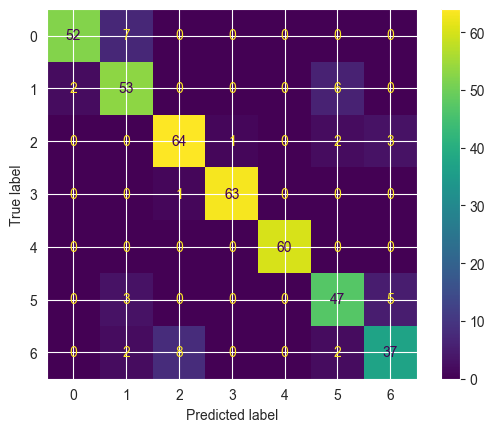

In [22]:
# Confusion Matrix Grafigi

ConfusionMatrixDisplay.from_estimator(svm_classifier_non_scaled, X_test, y_test)
plt.show()

### Support Vector Classification (With Scale)

In [23]:
svm_classifier = SVC(kernel="linear", C=1.0, random_state=42)

svm_classifier.fit(scaled_X_train, y_train)

y_prediction = svm_classifier.predict(scaled_X_test)

accuracy = accuracy_score(y_test, y_prediction)

print(f"Test Verisinin Dogruluk Skoru: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_prediction))

Test Verisinin Dogruluk Skoru: 95.69%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94        59
           1       0.89      0.95      0.92        61
           2       1.00      0.97      0.99        70
           3       0.98      1.00      0.99        64
           4       1.00      1.00      1.00        60
           5       0.94      0.89      0.92        55
           6       0.89      0.98      0.93        49

    accuracy                           0.96       418
   macro avg       0.96      0.96      0.95       418
weighted avg       0.96      0.96      0.96       418



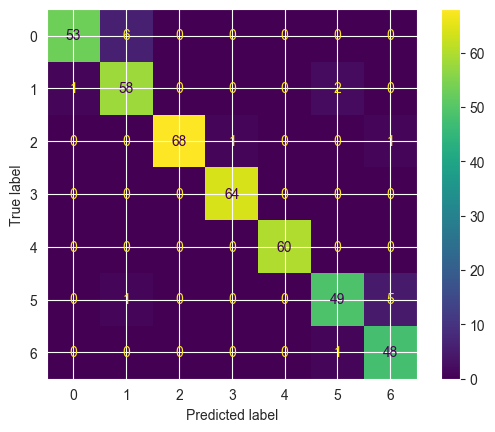

In [24]:
# Confusion Matrix Grafigi

ConfusionMatrixDisplay.from_estimator(svm_classifier, scaled_X_test, y_test)
plt.show()

## KNN

### KNN (No Scale)

In [25]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

knn_prediction = knn.predict(X_test)

accuracy = accuracy_score(y_test, knn_prediction)
print(f"Test Verisinin Dogruluk Skoru: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, knn_prediction))

Test Verisinin Dogruluk Skoru: 90.67%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.83      0.89        59
           1       0.72      0.92      0.81        61
           2       0.93      0.90      0.91        70
           3       1.00      0.92      0.96        64
           4       0.98      1.00      0.99        60
           5       0.89      0.89      0.89        55
           6       0.93      0.88      0.91        49

    accuracy                           0.91       418
   macro avg       0.92      0.91      0.91       418
weighted avg       0.92      0.91      0.91       418



C:\Users\alpar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Sistem belirtilen dosyayı bulamıyor
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\alpar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2288.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  Fil

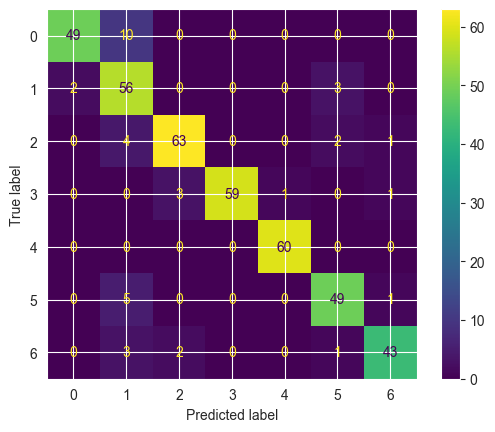

In [26]:
# Confusion Matrix Grafigi

ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)
plt.show()

### KNN (With Scale)

In [27]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(scaled_X_train, y_train)

knn_prediction = knn.predict(scaled_X_test)

accuracy = accuracy_score(y_test, knn_prediction)
print(f"Test Verisinin Dogruluk Skoru: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, knn_prediction))

Test Verisinin Dogruluk Skoru: 82.78%

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        59
           1       0.62      0.52      0.57        61
           2       0.81      0.87      0.84        70
           3       0.95      0.97      0.96        64
           4       1.00      1.00      1.00        60
           5       0.86      0.69      0.77        55
           6       0.78      0.82      0.80        49

    accuracy                           0.83       418
   macro avg       0.83      0.82      0.82       418
weighted avg       0.83      0.83      0.82       418



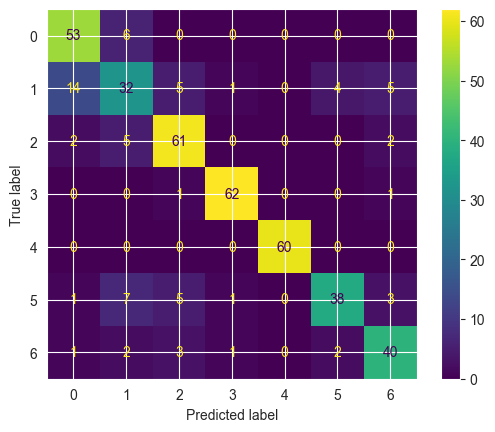

In [28]:
# Confusion Matrix Grafigi

ConfusionMatrixDisplay.from_estimator(knn, scaled_X_test, y_test)
plt.show()

## Random Forest Classifier

### Random Forest (No Scale)

In [29]:
random_forest = RandomForestClassifier(n_estimators=100, criterion="gini", random_state=42)

random_forest.fit(X_train, y_train)

random_forest_prediction = random_forest.predict(X_test)

accuracy = accuracy_score(y_test, random_forest_prediction)
print(f"Test Verisinin Dogruluk Skoru: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, random_forest_prediction))


Test Verisinin Dogruluk Skoru: 94.74%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        59
           1       0.81      0.98      0.89        61
           2       0.96      0.96      0.96        70
           3       1.00      0.97      0.98        64
           4       1.00      1.00      1.00        60
           5       0.98      0.87      0.92        55
           6       0.92      0.94      0.93        49

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418



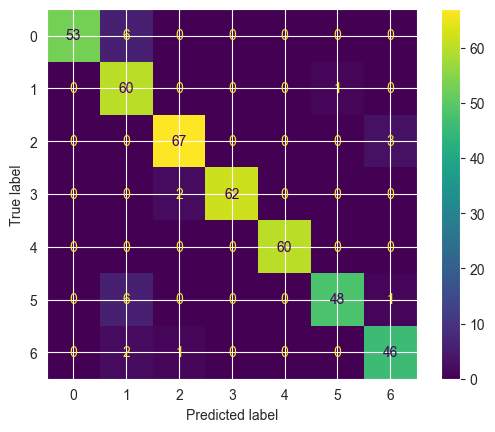

In [30]:
# Confusion Matrix Grafigi

ConfusionMatrixDisplay.from_estimator(random_forest, X_test, y_test)
plt.show()

### Random Forest (With Scale)

In [31]:
random_forest = RandomForestClassifier(n_estimators=100, criterion="gini", random_state=42)

random_forest.fit(scaled_X_train, y_train)

random_forest_prediction = random_forest.predict(scaled_X_test)

accuracy = accuracy_score(y_test, random_forest_prediction)
print(f"Test Verisinin Dogruluk Skoru: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, random_forest_prediction))


Test Verisinin Dogruluk Skoru: 94.74%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        59
           1       0.81      0.98      0.89        61
           2       0.96      0.96      0.96        70
           3       1.00      0.97      0.98        64
           4       1.00      1.00      1.00        60
           5       0.98      0.87      0.92        55
           6       0.92      0.94      0.93        49

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418



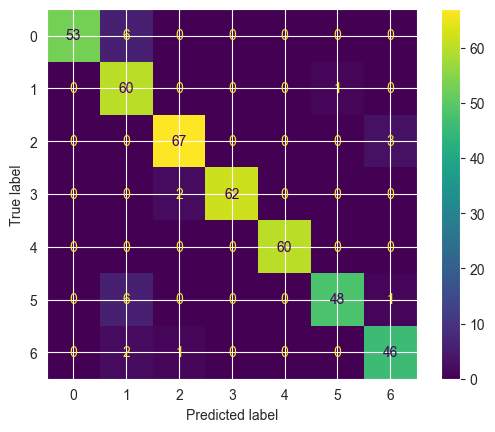

In [32]:
# Confusion Matrix Grafigi

ConfusionMatrixDisplay.from_estimator(random_forest, scaled_X_test, y_test)
plt.show()

## Logictic Regression

In [33]:
logistic_regression = LogisticRegression(solver="liblinear",NBSPmax_iter=200)

logistic_regression.fit(X_train, y_train)

logistic_regression_prediction = logistic_regression.predict(X_test)

accuracy = accuracy_score(y_test, logistic_regression_prediction)
print(f"Test Verisinin Dogruluk Skoru: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, logistic_regression_prediction))


TypeError: LogisticRegression.__init__() got an unexpected keyword argument 'NBSPmax_iter'

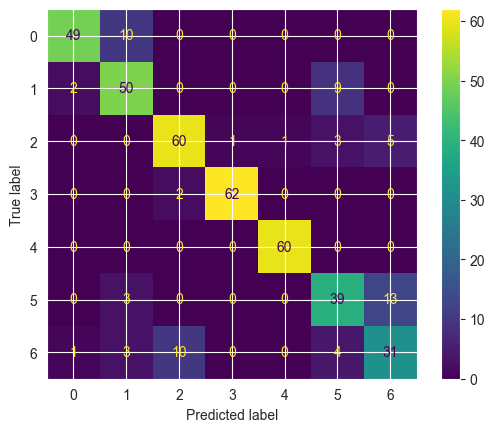

In [84]:
# Confusion Matrix Grafigi

ConfusionMatrixDisplay.from_estimator(logistic_regression, X_test, y_test)
plt.show()

## XGBoost (We will Use It)

In [85]:
xgb = xgb.XGBClassifier(objective="multi:softmax", num_class=len(y.unique()), random_state=42)

xgb.fit(scaled_X_train, y_train)

xgb_prediction = xgb.predict(scaled_X_test)

accuracy = accuracy_score(y_test, xgb_prediction)
print(f"Test Verisinin Dogruluk Skoru: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, xgb_prediction))

Test Verisinin Dogruluk Skoru: 95.45%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        59
           1       0.90      0.93      0.92        61
           2       0.96      0.96      0.96        70
           3       0.98      0.97      0.98        64
           4       1.00      1.00      1.00        60
           5       0.96      0.89      0.92        55
           6       0.90      0.96      0.93        49

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.96      0.95      0.95       418



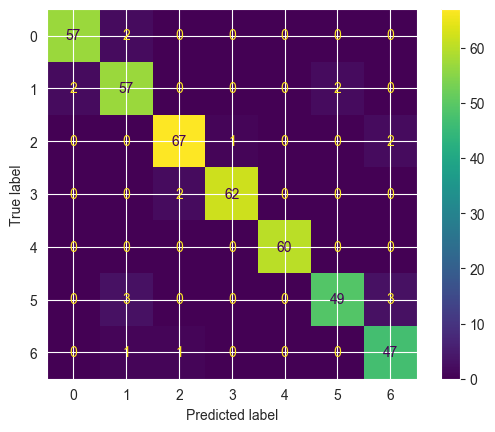

In [86]:
ConfusionMatrixDisplay.from_estimator(xgb, scaled_X_test, y_test)
plt.show()

# **Saving Model as .pkl**

In [87]:
from joblib import dump, load

# Modeli pickle kullanarak kaydetme
# dump(xgb, 'xgboost_model.pkl')

['xgboost_model.pkl']

In [91]:
correlation = df.corr()
correlation

,Unnamed: 0,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
Unnamed: 0,1.000000,-0.070027,0.180147,0.121360,0.770995,0.442563,0.342720,0.248400,0.057888,0.373870,-0.115050,0.103626,-0.212892,-0.176982,-0.072555,-0.100234,0.030578,0.304963
Gender,-0.070027,1.000000,0.050929,0.626411,0.163174,0.113492,0.061220,-0.271495,0.077817,0.074564,0.045501,0.095087,-0.102435,0.189454,0.022377,0.010574,-0.139044,0.014699
Age,0.180147,0.050929,1.000000,-0.031551,0.199063,0.200149,0.063383,0.014309,-0.055821,0.092512,0.090627,-0.044342,-0.117702,-0.148341,-0.302599,-0.046661,-0.600092,0.237792
Height,0.121360,0.626411,-0.031551,1.000000,0.456591,0.231830,0.180040,-0.040820,0.227539,0.057931,0.054554,0.220572,-0.136686,0.294235,0.041486,-0.135584,-0.068412,0.039395
Weight,0.770995,0.163174,0.199063,0.456591,1.000000,0.492968,0.274657,0.216720,0.092092,0.300269,0.024370,0.203790,-0.205408,-0.056408,-0.079361,-0.211350,0.009837,0.388800
family_history_with_overweight,0.442563,0.113492,0.200149,0.231830,0.492968,1.000000,0.214329,0.033226,0.028312,0.207738,0.014885,0.168563,-0.193947,-0.062910,0.002311,0.028403,-0.092730,0.330391
FAVC,0.342720,0.061220,0.063383,0.180040,0.274657,0.214329,1.000000,-0.025363,-0.006366,0.147921,-0.050713,0.003008,-0.191277,-0.111124,0.071498,-0.087661,-0.069422,0.041023
FCVC,0.248400,-0.271495,0.014309,-0.040820,0.216720,0.033226,-0.025363,1.000000,0.034712,-0.038509,0.013774,0.081268,0.071163,0.021999,-0.104213,-0.063152,0.068970,0.025803
NCP,0.057888,0.077817,-0.055821,0.227539,0.092092,0.028312,-0.006366,0.034712,1.000000,-0.072304,0.005005,0.075176,-0.020452,0.127831,0.015775,-0.083026,-0.043659,-0.088256
CAEC,0.373870,0.074564,0.092512,0.057931,0.300269,0.207738,0.147921,-0.038509,-0.072304,1.000000,-0.054960,0.114832,-0.109393,-0.034762,-0.036706,-0.039502,-0.058158,0.314510


# **Checking Label Encoding for Web UI**

In [6]:
df = pd.read_csv("Obesity_Dataset.csv")
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,0.00,1.000,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.00,yes,no,3.0,3.0,Sometimes,yes,3.00,yes,3.00,0.000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,2.00,1.000,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.00,no,no,3.0,3.0,Sometimes,no,2.00,no,2.00,0.000,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.80,no,no,2.0,1.0,Sometimes,no,2.00,no,0.00,0.000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131.41,yes,yes,3.0,3.0,Sometimes,no,1.73,no,1.68,0.906,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.75,133.74,yes,yes,3.0,3.0,Sometimes,no,2.01,no,1.34,0.599,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.75,133.69,yes,yes,3.0,3.0,Sometimes,no,2.05,no,1.41,0.646,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.74,133.35,yes,yes,3.0,3.0,Sometimes,no,2.85,no,1.14,0.586,Sometimes,Public_Transportation,Obesity_Type_III


In [34]:
df["CAEC"].unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [39]:
df.CALC.unique()

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [4]:
df.MTRANS.unique()

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

In [7]:
df.NObeyesdad.unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [4]:
df = pd.read_csv("Obesity_DataSet_Edited.csv")
df

,Unnamed: 0,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,0,21,1.62,64.00,1,0,2.0,3.0,2,0,2.00,0,0.00,1.000,3,3,1
1,1,0,21,1.52,56.00,1,0,3.0,3.0,2,1,3.00,1,3.00,0.000,2,3,1
2,2,1,23,1.80,77.00,1,0,2.0,3.0,2,0,2.00,0,2.00,1.000,1,3,1
3,3,1,27,1.80,87.00,0,0,3.0,3.0,2,0,2.00,0,2.00,0.000,1,4,5
4,4,1,22,1.78,89.80,0,0,2.0,1.0,2,0,2.00,0,0.00,0.000,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2082,2106,0,21,1.71,131.41,1,1,3.0,3.0,2,0,1.73,0,1.68,0.906,2,3,4
2083,2107,0,22,1.75,133.74,1,1,3.0,3.0,2,0,2.01,0,1.34,0.599,2,3,4
2084,2108,0,23,1.75,133.69,1,1,3.0,3.0,2,0,2.05,0,1.41,0.646,2,3,4
2085,2109,0,24,1.74,133.35,1,1,3.0,3.0,2,0,2.85,0,1.14,0.586,2,3,4


In [5]:
df.NObeyesdad.unique()

array([1, 5, 6, 2, 0, 3, 4])

In [37]:
df.CAEC.unique()

array([2, 1, 0, 3])

In [41]:
df.CALC.unique()

array([3, 2, 1, 0])

In [6]:
df.MTRANS.unique()

array([3, 4, 0, 2, 1])

In [34]:
df.dtypes

Unnamed: 0                          int64
Gender                              int64
Age                                 int64
Height                            float64
Weight                            float64
family_history_with_overweight      int64
FAVC                                int64
FCVC                              float64
NCP                               float64
CAEC                                int64
SMOKE                               int64
CH2O                              float64
SCC                                 int64
FAF                               float64
TUE                               float64
CALC                                int64
MTRANS                              int64
NObeyesdad                          int64
dtype: object